# **Importando bibliotecas**

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import string
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from util.construction import *
from util.analysis import *
from util.graphics import *

# **Obtendo os artistas presentes no Spotify**

## **Realizando a conexão com a API do Spotify**

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='76e709d9b20c4cfd92322dae744a8a24',
                                                         client_secret='ca2ce1227ecf4500a1918025cfcdb2a4'))


# **Filtrando**

# **Criando uma rede com as informações obtidas e tratando/retirando algumas colunas**

In [3]:
df = pd.read_csv('../data/spotify_artists/spotify_artists.csv')
df

In [4]:
df_filtered = df[df['popularity'] >= 65]
df_filtered

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
19719,https://open.spotify.com/artist/0pVHBkObr9UNIW...,80561,NaN,0pVHBkObr9UNIWpms1e4I0,Zartmann,67,spotify:artist:0pVHBkObr9UNIWpms1e4I0
19720,https://open.spotify.com/artist/54kCbQZaZWHnww...,2213913,"french hip hop, pop urbaine, r&b francais, rap...",54kCbQZaZWHnwwj9VP2hn4,Zola,67,spotify:artist:54kCbQZaZWHnwwj9VP2hn4
19731,https://open.spotify.com/artist/3qZ2n5keOAat1S...,1799838,"mpb, pagode, partido alto, samba, samba de roda",3qZ2n5keOAat1SoF6bHwmb,Zeca Pagodinho,65,spotify:artist:3qZ2n5keOAat1SoF6bHwmb
20457,https://open.spotify.com/artist/2HIP5sNZWkrPgS...,56794,NaN,2HIP5sNZWkrPgSBWRk8XpA,SIRA,65,spotify:artist:2HIP5sNZWkrPgSBWRk8XpA


In [5]:
import time
artist_related_artists = []

for artist_id in tqdm(df_filtered['id']):
    
    aux_list = []
    related_artists = sp.artist_related_artists(artist_id)
    
    for related_artist in related_artists['artists']:
        if related_artist['id'] in df_filtered['id'].to_numpy():
            aux_list.append(related_artist['id'])
    
    artist_related_artists.append(', '.join(aux_list))

    time.sleep(0.3) 

100%|██████████| 3023/3023 [29:40<00:00,  1.70it/s]


In [7]:
df_filtered.loc[:, 'related_artists'] = artist_related_artists
df_filtered

/tmp/ipykernel_30496/229131279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'related_artists'] = artist_related_artists


,external_urls,followers,genres,id,name,popularity,uri,related_artists
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
19719,https://open.spotify.com/artist/0pVHBkObr9UNIW...,80561,NaN,0pVHBkObr9UNIWpms1e4I0,Zartmann,67,spotify:artist:0pVHBkObr9UNIWpms1e4I0,"2E5bmPbkiGhZ3ZK798zFIb, 5RgzUZORebl59TcvCRZsD2..."
19720,https://open.spotify.com/artist/54kCbQZaZWHnww...,2213913,"french hip hop, pop urbaine, r&b francais, rap...",54kCbQZaZWHnwwj9VP2hn4,Zola,67,spotify:artist:54kCbQZaZWHnwwj9VP2hn4,"1q7T9rFQ2a2ukA1PU51fo3, 6HCBnyTBSLdb3TFn2ayulY..."
19731,https://open.spotify.com/artist/3qZ2n5keOAat1S...,1799838,"mpb, pagode, partido alto, samba, samba de roda",3qZ2n5keOAat1SoF6bHwmb,Zeca Pagodinho,65,spotify:artist:3qZ2n5keOAat1SoF6bHwmb,
20457,https://open.spotify.com/artist/2HIP5sNZWkrPgS...,56794,NaN,2HIP5sNZWkrPgSBWRk8XpA,SIRA,65,spotify:artist:2HIP5sNZWkrPgSBWRk8XpA,"2SRd7Kx7xWkZjoaFKgEreg, 5RgzUZORebl59TcvCRZsD2..."


In [8]:
df_filtered.to_csv('data/spotify_related_artists/spotify_related_artists.csv', index=False)

In [2]:
df =  pd.read_csv('data/spotify_related_artists/spotify_related_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri,related_artists
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
3018,https://open.spotify.com/artist/0pVHBkObr9UNIW...,80561,NaN,0pVHBkObr9UNIWpms1e4I0,Zartmann,67,spotify:artist:0pVHBkObr9UNIWpms1e4I0,"2E5bmPbkiGhZ3ZK798zFIb, 5RgzUZORebl59TcvCRZsD2..."
3019,https://open.spotify.com/artist/54kCbQZaZWHnww...,2213913,"french hip hop, pop urbaine, r&b francais, rap...",54kCbQZaZWHnwwj9VP2hn4,Zola,67,spotify:artist:54kCbQZaZWHnwwj9VP2hn4,"1q7T9rFQ2a2ukA1PU51fo3, 6HCBnyTBSLdb3TFn2ayulY..."
3020,https://open.spotify.com/artist/3qZ2n5keOAat1S...,1799838,"mpb, pagode, partido alto, samba, samba de roda",3qZ2n5keOAat1SoF6bHwmb,Zeca Pagodinho,65,spotify:artist:3qZ2n5keOAat1SoF6bHwmb,NaN
3021,https://open.spotify.com/artist/2HIP5sNZWkrPgS...,56794,NaN,2HIP5sNZWkrPgSBWRk8XpA,SIRA,65,spotify:artist:2HIP5sNZWkrPgSBWRk8XpA,"2SRd7Kx7xWkZjoaFKgEreg, 5RgzUZORebl59TcvCRZsD2..."


In [3]:
network = createNetowrk(df, 'related_artists')

3023it [00:00, 56458.19it/s]


In [4]:
printInformations(network)

Quantidade de vértices: 2940
Quantidade de arestas: 17660
Quantidade de componentes: 41
Menor grau da rede: 1
Maior grau da rede: 46
Grau médio da rede: 12.013605442176871
Densidade da rede: 0.004087650711866918
Distância média: 7.614761115171579
Coeficiente de clustering médio: 0.5135705768991174 (apenas 96.87% da rede foi considerada no cálculo, que que possuem grau maior do que um)


In [5]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = degreeDistribution(network)

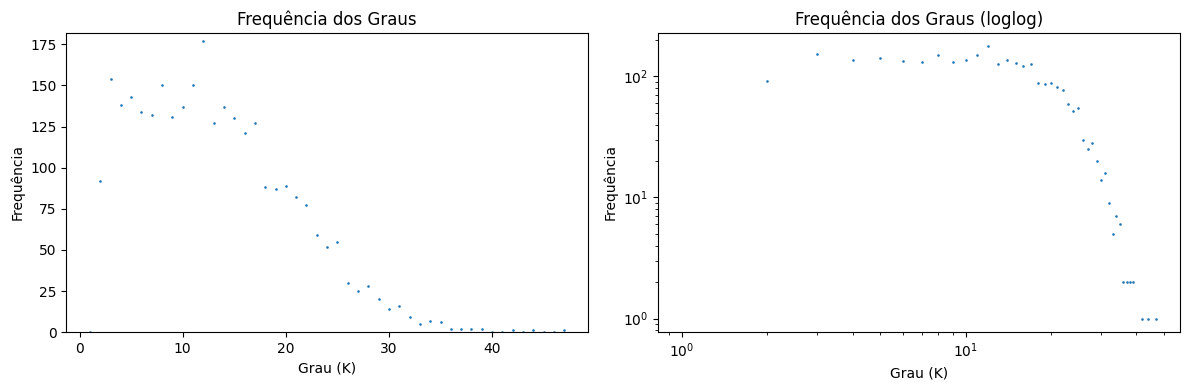

In [6]:
createGraphic(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = 'spotify_related_artists')

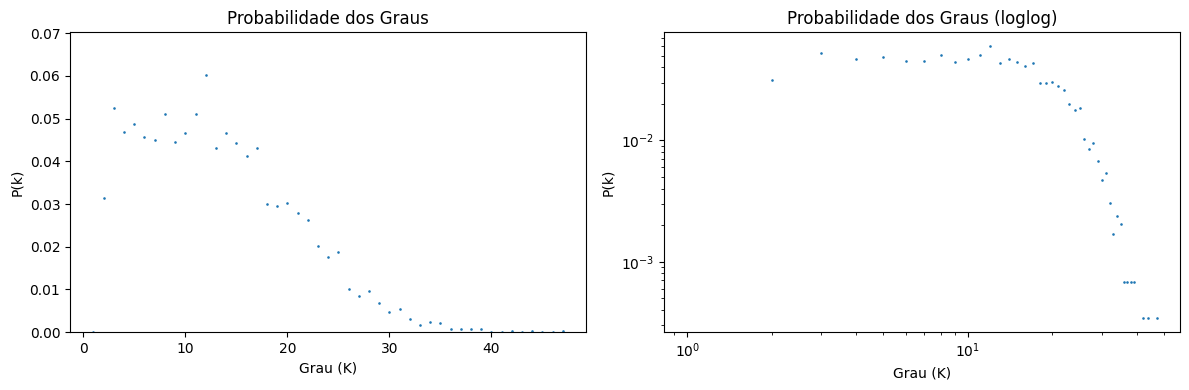

In [7]:
createGraphic(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = 'spotify_related_artists')

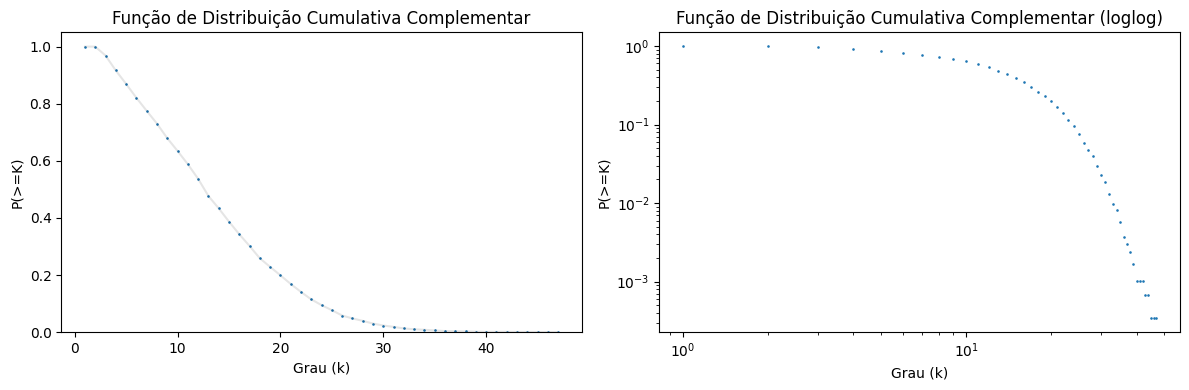

In [8]:
createGraphic(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = 'spotify_related_artists')

In [4]:
degree_centrality, eigenvector_centrality = calculateCentralities(network)

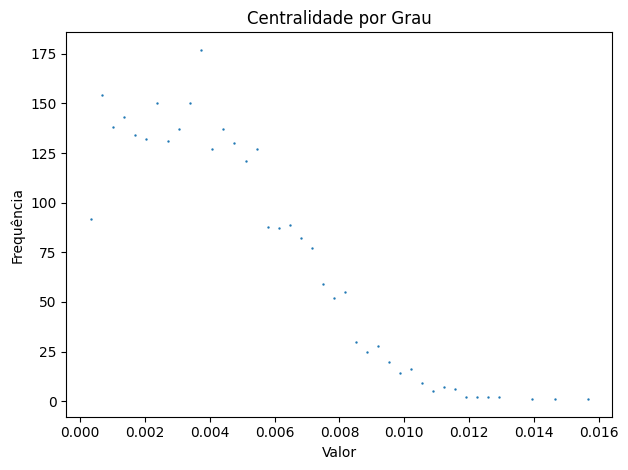

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 41.
	O menor valor é 0.0003402517863218782 e sua frequência é 92.
	O maior valor é 0.015651582170806397 e sua frequência é 1.


In [10]:
analysis_centrality = createGraphicCentrality(data = degree_centrality, title = 'Centralidade por Grau', name_network = 'spotify_related_artists')
printInformationAnalysisCentrality(analysis_centrality)

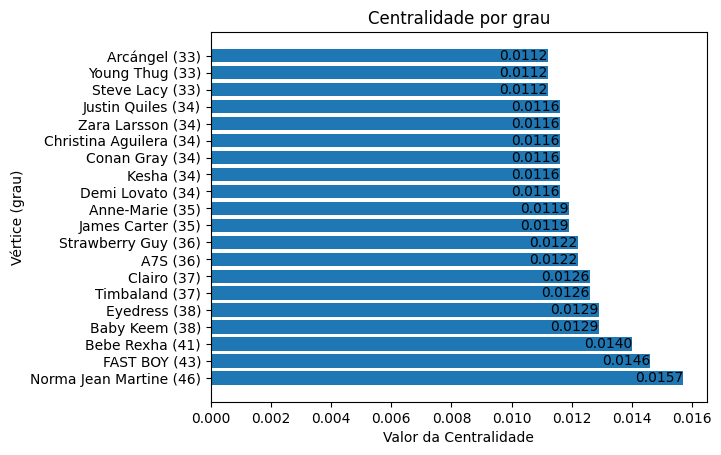

In [5]:
createRankingCentrality(df=df, centrality = degree_centrality, network = network, title = 'Centralidade por grau', name_network = 'spotify_related_artists')

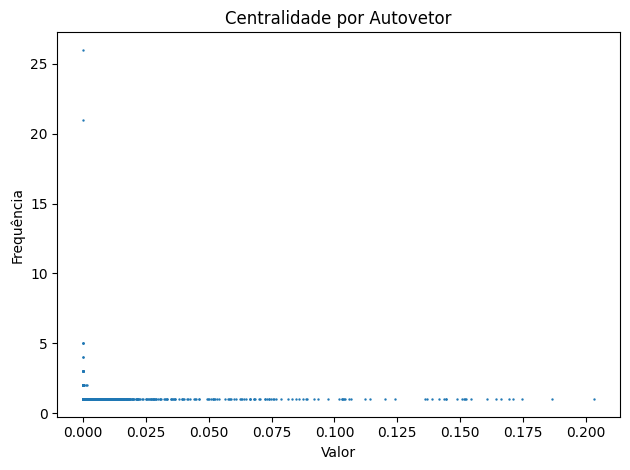

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 2805.
	O menor valor é 1.1206615666326438e-125 e sua frequência é 26.
	O maior valor é 0.2034206732690556 e sua frequência é 1.


In [6]:
analysis_centrality = createGraphicCentrality(data = eigenvector_centrality, title = 'Centralidade por Autovetor', name_network = 'spotify_related_artists')
printInformationAnalysisCentrality(analysis_centrality)

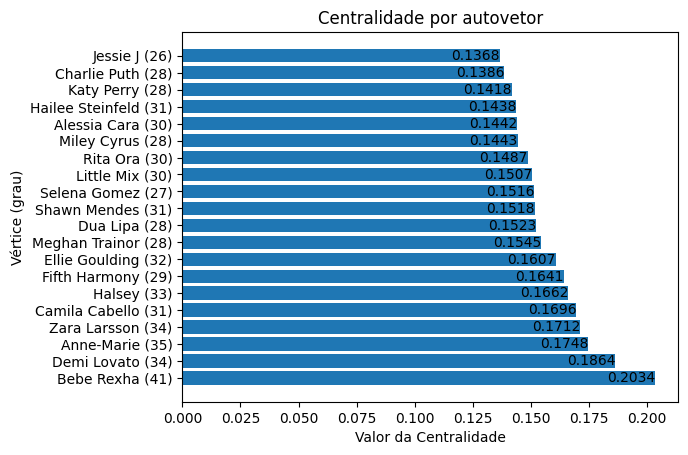

In [7]:
centrality_ranking = sorted(eigenvector_centrality, reverse = True)
createRankingCentrality(df=df, centrality = eigenvector_centrality, network = network, title = 'Centralidade por autovetor', name_network = 'spotify_related_artists')